<a href="https://colab.research.google.com/github/Zoro114/mne/blob/main/Artifacts_and_artifact_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.5 MB 29.1 MB/s 


In [ ]:
import mne
import numpy as np
from mne.datasets import sample
from mne.preprocessing import create_eog_epochs,create_ecg_epochs


In [ ]:
data_path=sample.data_path()
raw_fname=data_path+'/MEG/sample/sample_audvis_raw.fif' 
raw=mne.io.read_raw_fif(raw_fname,preload=True)

Opening raw data file /root/mne_data/MNE-sample-data//MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


<ipython-input-6-83f3f24378c7>:2: DeprecationWarning: data_path functions now return pathlib.Path objects which do not natively support the plus (+) operator, switch to using forward slash (/) instead. Support for plus will be removed in 1.2.
  raw_fname=data_path+'/MEG/sample/sample_audvis_raw.fif'


Reading 0 ... 166799  =      0.000 ...   277.714 secs...


Opening raw-browser...


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


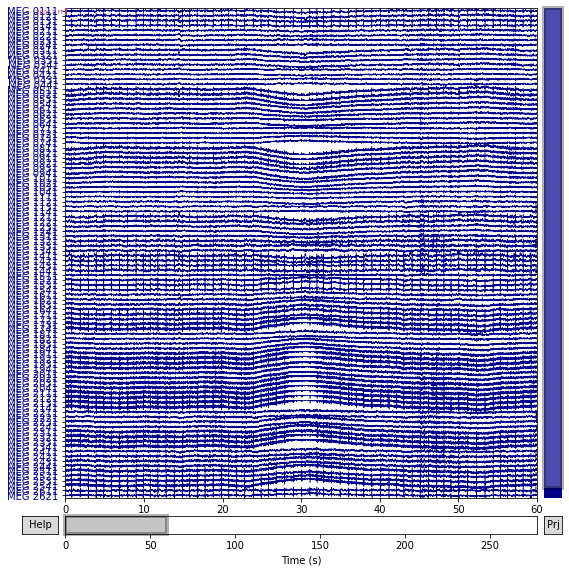

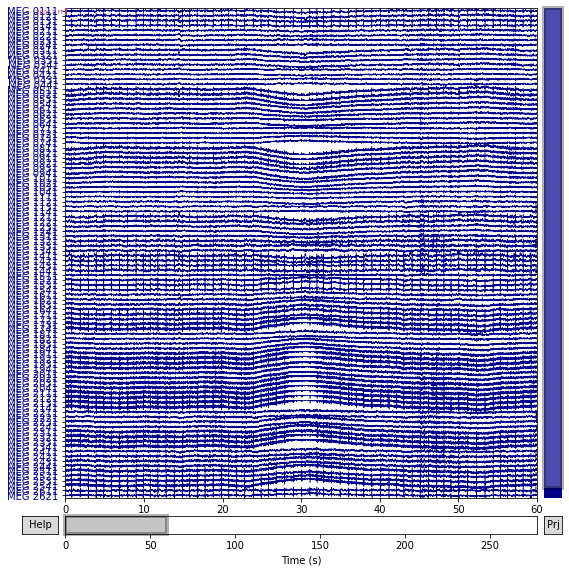

In [ ]:
(raw.copy().pick_types(meg='mag')
           .del_proj(0)
           .plot(duration=60,n_channels=100,remove_dc=False))

Effective window size : 3.410 (s)
Effective window size : 3.410 (s)
Effective window size : 3.410 (s)


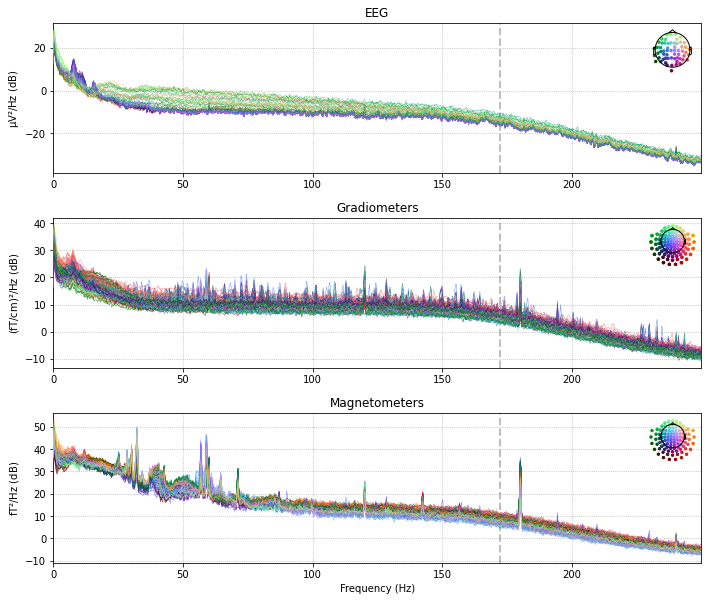

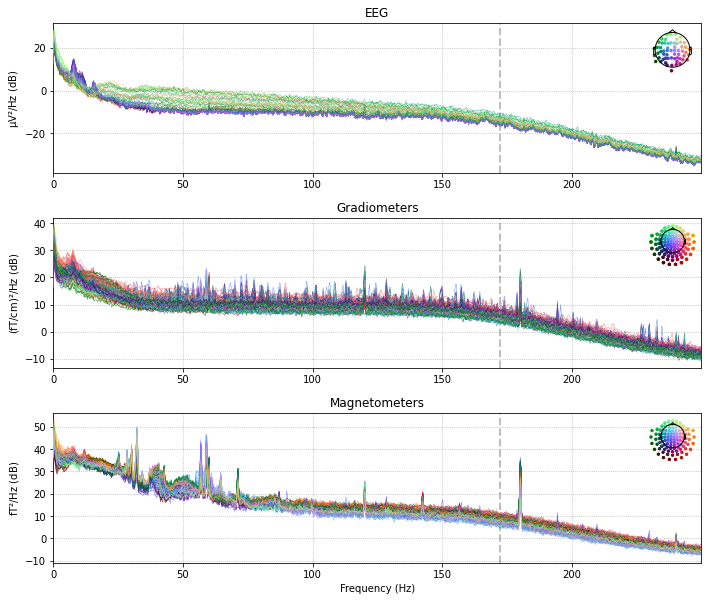

In [ ]:
raw.plot_psd(tmax=np.inf,fmax=250)

Reconstructing ECG signal from Magnetometers
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 6007 samples (10.001 sec)

Number of ECG events detected : 283 (average pulse 61 / min.)
Not setting metadata
283 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 3)
Using data from preloaded Raw for 283 events and 601 original time points ...
0 bad epochs dropped
we found 283 ecg event
Created an SSP operator (subspace dimension = 3)
3 projection items activated
SSP projectors applied...
Removing projector <Projection | PCA-v1, active : Tru

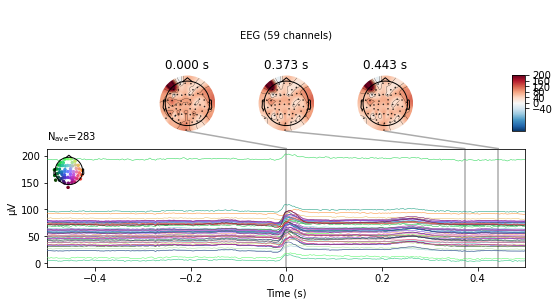

Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


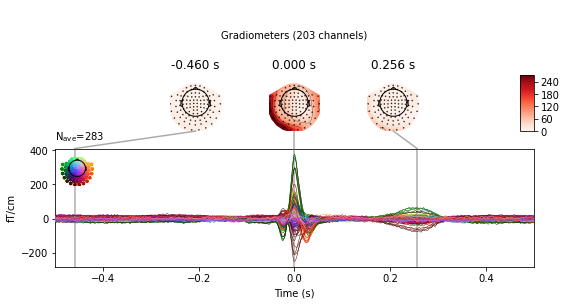

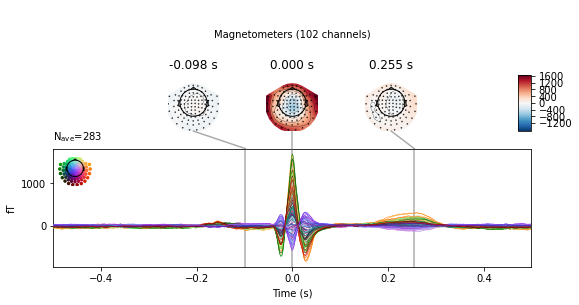

[<Figure size 576x302.4 with 7 Axes>,
 <Figure size 576x302.4 with 7 Axes>,
 <Figure size 576x302.4 with 7 Axes>]

In [ ]:
avg_ecg=create_ecg_epochs(raw).average()
print("we found %i ecg event"% avg_ecg.nave)
avg_ecg.plot_joint()

Using EOG channel: EOG 061
EOG channel index for this subject is: [375]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 6007 samples (10.001 sec)

Now detecting blinks and generating corresponding events
Found 46 significant peaks
Number of EOG events detected: 46
Not setting metadata
46 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 3)
Using data from preloaded Raw for 46 events and 601 original time points ...
0 bad epochs dropped
we found 46 eog eve

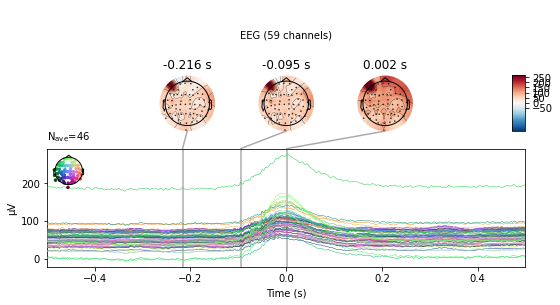

Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


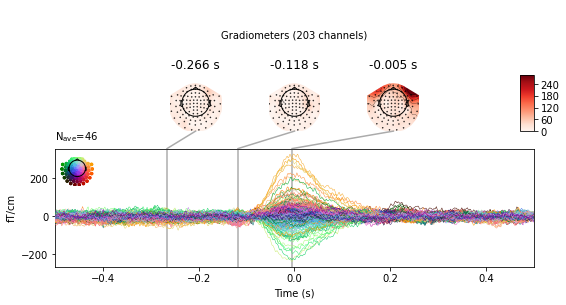

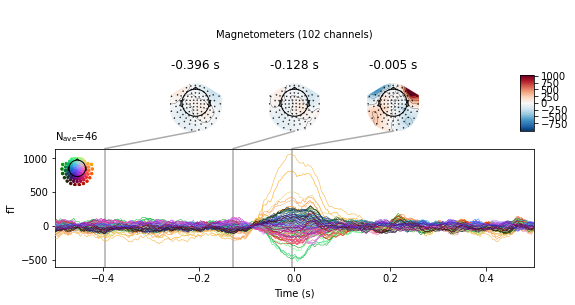

[<Figure size 576x302.4 with 7 Axes>,
 <Figure size 576x302.4 with 7 Axes>,
 <Figure size 576x302.4 with 7 Axes>]

In [ ]:
avg_eog=create_eog_epochs(raw).average()
print("we found %i eog event "%avg_eog.nave)
avg_eog.plot_joint()